<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Pr%C3%A1ctica_27_Clases_No_Balanceadas%2C_Evaluaci%C3%B3n_y_SVM_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo

## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.

## 🔧 Instrucciones

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF


# **1. Carga y exploración del dataset**
   

### **1(a): Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Crear DataFrame SOLO con las características
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### **1(b): Verifica la distribución de clases.**

Distribución de clases:
target
1    357
0    212
Name: count, dtype: int64


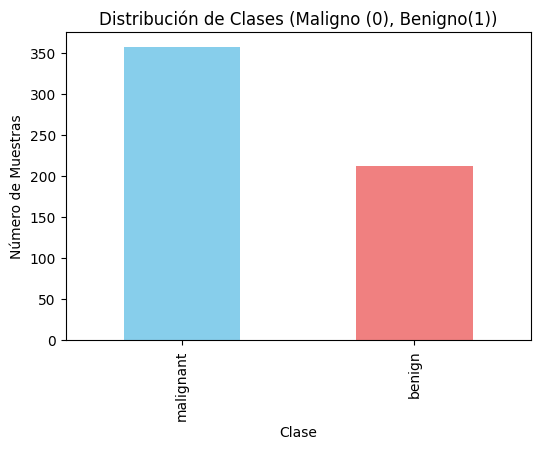

In [ ]:
df['target'] = datos.target
print('Distribución de clases:')
print(df['target'].value_counts())

plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases (Maligno (0), Benigno(1))')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.xticks(ticks=[0, 1], labels=datos.target_names)
plt.show()

### **1(c): Visualiza con un gráfico la distribución y las principales características.**

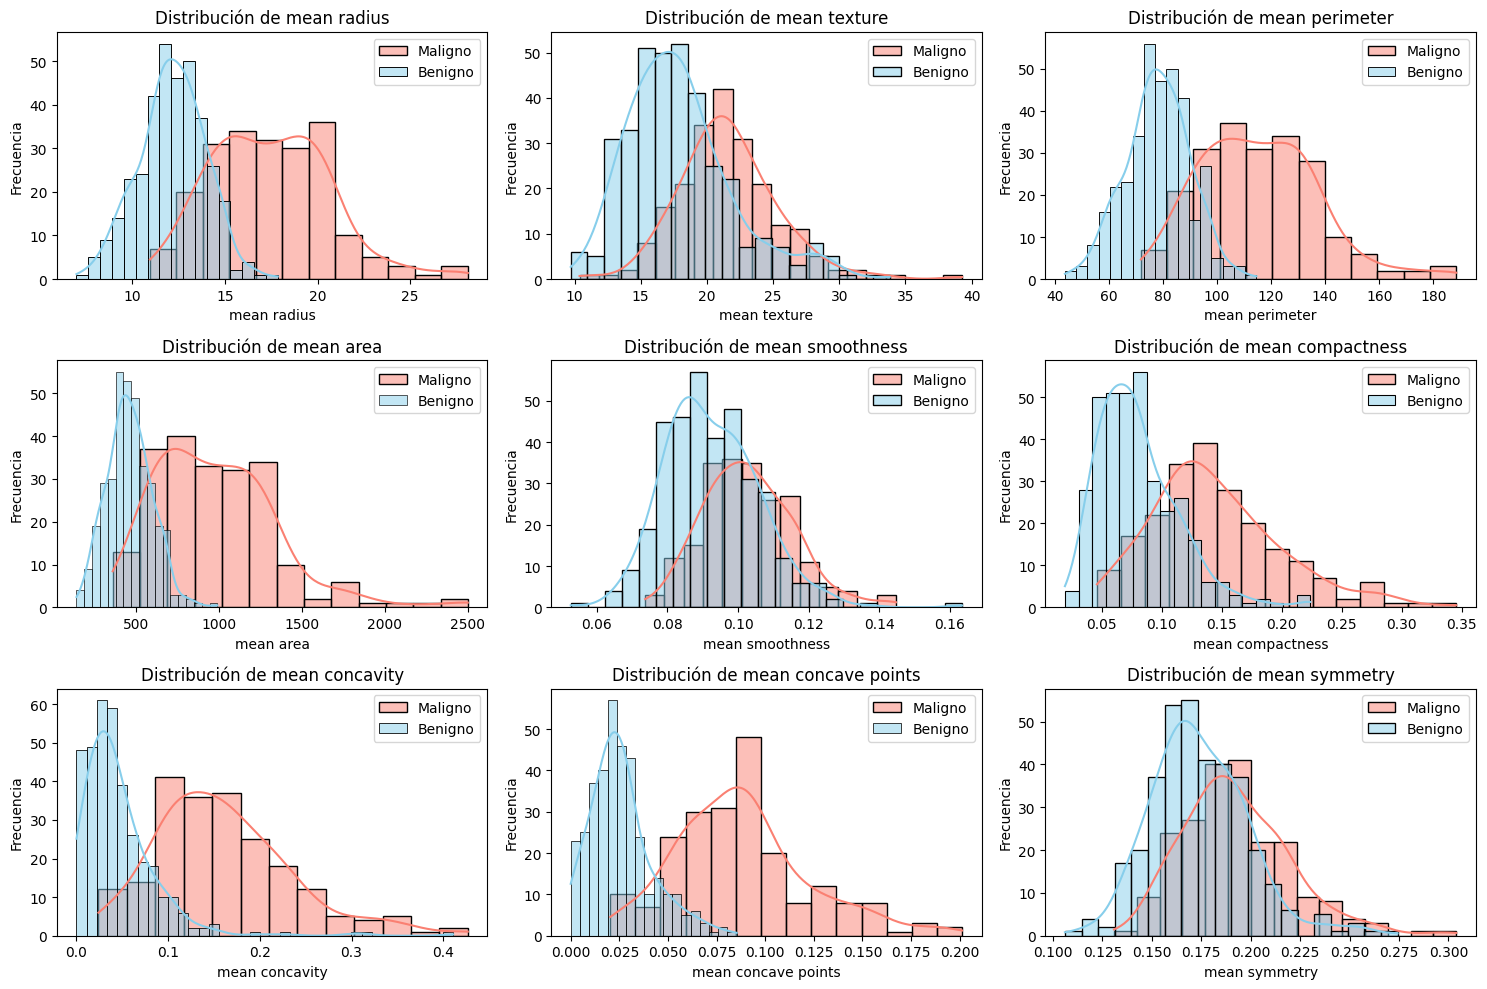

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = [ 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 3, i + 1) # 2 rows, 3 columns
    sns.histplot(df[df['target'] == 0][feature], color='salmon', label='Maligno', kde=True)
    sns.histplot(df[df['target'] == 1][feature], color='skyblue', label='Benigno', kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()

# **2. Entrenamiento base con SVM**

### **2(a): Usa un modelo SVM con kernel RBF.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])

### **2(b): Aplica StratifiedKFold con 5 particiones.**

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### **2(c): Evalúa con métricas por clase: precisión, recall, F1-score.**

In [ ]:
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

print("\nReporte de clasificación (métricas por clase y promedios):\n")
print(classification_report(y, y_pred, target_names=target_names, digits=3))


Reporte de clasificación (métricas por clase y promedios):

              precision    recall  f1-score   support

   malignant      0.981     0.958     0.969       212
      benign      0.975     0.989     0.982       357

    accuracy                          0.977       569
   macro avg      0.978     0.973     0.975       569
weighted avg      0.977     0.977     0.977       569



### **2(d): Calcula y reporta métricas promedio y por clase.**

In [ ]:
from sklearn.metrics import classification_report

print("\nReporte de clasificación (métricas por clase y promedios):\n")
print(classification_report(y, y_pred, target_names=target_names, digits=3))


Reporte de clasificación (métricas por clase y promedios):

              precision    recall  f1-score   support

   malignant      0.981     0.958     0.969       212
      benign      0.975     0.989     0.982       357

    accuracy                          0.977       569
   macro avg      0.978     0.973     0.975       569
weighted avg      0.977     0.977     0.977       569



# **3. Análisis del problema de desbalance**


### **3(a): Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?**

Los resultados reportan que la clase maligno (cancer) presenta un desempeño ligeramente inferior en comparación con la clase benigno, particularmente en las métricas de recall (0.958) y F1-score (0.969), frente a los valores obtenidos para la clase benigna (recall = 0.989 y F1-score = 0.982). Este comportamiento indica que el modelo tiene mayor dificultad para identificar correctamente los casos malignos, lo que se refleja en un número relativamente mayor de falsos negativos para esta clase.

Se infiere que la causa principal de este comportamiento es el desbalance de clases presente en el dataset: existen 212 muestras de la clase tipo maligno frente a 357 de la clase benigno. Debido a esta diferencia, el modelo tiene mayor exposición a la clase mayoritaria durante el entrenamiento, lo que facilita su aprendizaje para identificar correctamente los casos benignos.

### **3(b): Reporta matriz de confusión promedio.**




Matriz de confusión:
 [[203   9]
 [  4 353]]


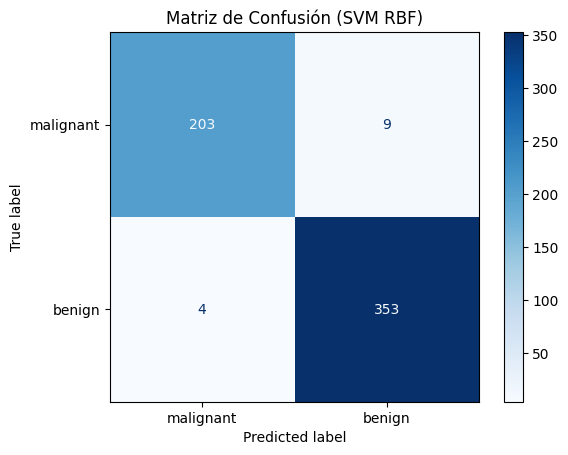

In [ ]:
cm = confusion_matrix(y, y_pred)
print("\nMatriz de confusión:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión (SVM RBF)")
plt.grid(False)
plt.show()

# **4. Aplicación de SMOTE**

### **4(a): Aplica SMOTE solo al conjunto de entrenamiento dentro de cada fold.**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline_smote = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])

### **4(b): Entrena nuevamente la SVM.**


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_smote = cross_val_predict(pipeline_smote, X, y, cv=cv)

### **4(c): Compara métricas antes y después.**

In [ ]:
from sklearn.metrics import classification_report

# 1) Reportes completos
print("SIN SMOTE (SVM RBF)\n")
print(classification_report(y, y_pred, target_names=target_names, digits=3))

print("\n CON SMOTE (SVM RBF + SMOTE)\n")
print(classification_report(y, y_pred_smote, target_names=target_names, digits=3))

# 2) Comparación numérica de F1 por clase y promedios
report_no = classification_report(y, y_pred,
                                  target_names=target_names,
                                  output_dict=True)
report_sm = classification_report(y, y_pred_smote,
                                  target_names=target_names,
                                  output_dict=True)

print("\n Comparación de F1-score por clase")
for name in target_names:
    f1_no = report_no[name]["f1-score"]
    f1_sm = report_sm[name]["f1-score"]
    print(f"Clase {name:9s}  |  F1 sin SMOTE: {f1_no:.3f}   |  F1 con SMOTE: {f1_sm:.3f}")

print("\n=== Comparación de F1-score promedio ===")
print(f"Macro avg    |  sin SMOTE: {report_no['macro avg']['f1-score']:.3f}   "
      f"|  con SMOTE: {report_sm['macro avg']['f1-score']:.3f}")
print(f"Weighted avg |  sin SMOTE: {report_no['weighted avg']['f1-score']:.3f} "
      f"|  con SMOTE: {report_sm['weighted avg']['f1-score']:.3f}")

SIN SMOTE (SVM RBF)

              precision    recall  f1-score   support

   malignant      0.981     0.958     0.969       212
      benign      0.975     0.989     0.982       357

    accuracy                          0.977       569
   macro avg      0.978     0.973     0.975       569
weighted avg      0.977     0.977     0.977       569


 CON SMOTE (SVM RBF + SMOTE)

              precision    recall  f1-score   support

   malignant      0.971     0.962     0.967       212
      benign      0.978     0.983     0.980       357

    accuracy                          0.975       569
   macro avg      0.975     0.973     0.974       569
weighted avg      0.975     0.975     0.975       569


 Comparación de F1-score por clase
Clase malignant  |  F1 sin SMOTE: 0.969   |  F1 con SMOTE: 0.967
Clase benign     |  F1 sin SMOTE: 0.982   |  F1 con SMOTE: 0.980

=== Comparación de F1-score promedio ===
Macro avg    |  sin SMOTE: 0.975   |  con SMOTE: 0.974
Weighted avg |  sin SMOTE: 0.97

# **5. Visualización y conclusiones**

### **5(a): Usa un gráfico de barras comparando F1 por clase antes y después.**

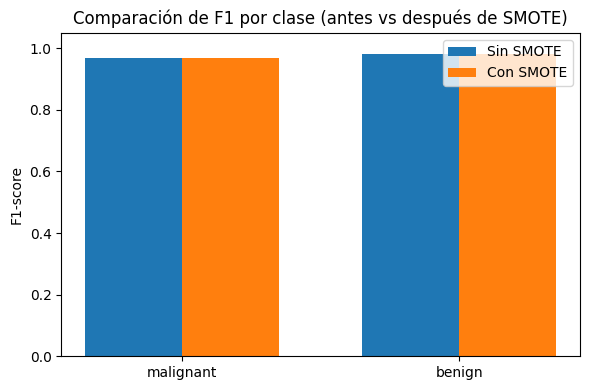

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

report_no = classification_report(y, y_pred,
                                  target_names=target_names,
                                  output_dict=True)
report_sm = classification_report(y, y_pred_smote,
                                  target_names=target_names,
                                  output_dict=True)

f1_no = [report_no[name]["f1-score"] for name in target_names]
f1_sm = [report_sm[name]["f1-score"] for name in target_names]


x = np.arange(len(target_names))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, f1_no, width, label='Sin SMOTE')
plt.bar(x + width/2, f1_sm, width, label='Con SMOTE')

plt.xticks(x, target_names)
plt.ylim(0, 1.05)
plt.ylabel('F1-score')
plt.title('Comparación de F1 por clase (antes vs después de SMOTE)')
plt.legend()
plt.tight_layout()
plt.show()

### **5(b): Comenta las ventajas y riesgos de aplicar SMOTE con SVM.**

Los resultados que se reportan indican que, tras aplicar el método SMOTE, el desempeño del modelo SVM con kernel RBF se mantienen prácticamente igual al observado sin realizar sobremuestreo. En la clase maligna podemo observar que el F1-score cambia de 0.969 a 0.967, mientras que en la clase benigna pasa de 0.982 a 0.980. Estas variaciones son mínimas y reflejan que, en este caso particular, SMOTE no produce una mejora significativa en el rendimiento del modelo.

Entre las principales ventajas de aplicar el método de SMOTE en un modelo SVM con kernel RBF se encuentra la capacidad de equilibrar la cantidad de ejemplos por clase, lo que reduce el sesgo del modelo hacia la clase mayoritaria (en este caso benigno) y permite que el margen de decisión incorpore de manera más adecuada los patrones de la clase minoritaria (maligno). Por otra parte, al generar ejemplos sintéticos, SMOTE puede mejorar el recall de la clase minoritaria, lo cual resulta importante en problemas clínicos donde la correcta identificación de tumores malignos es crítica. Sin embargo, en este caso la mejora observada fue mínima, la técnica suele ofrecer beneficios más notorios cuando el desbalance es más severo. Además, su uso contribuye a incrementar la estabilidad del modelo ante distribuciones de clases muy desiguales, promoviendo un aprendizaje más equilibrado.

Entre los principales riesgos y limitaciones de aplicar el método SMOTE en modelos SVM se encuentra la posibilidad de generar ruido cuando los ejemplos sintéticos no representan adecuadamente la estructura real de la clase minoritaria, especialmente en las zonas cercanas al margen de decisión. De acuerdo a los presentaciones y videos, el uso de SMOTE puede incrementar el riesgo de sobreajuste, ya que los nuevos puntos creados pueden ser demasiado similares entre sí, llevando al modelo a memorizar patrones artificiales que no aparecen en los datos reales. Además, es importante considerar también que este método no garantiza mejoras en el rendimiento: como se observo en los resultados de este ejercicio, el desempeño del modelo se mantuvo prácticamente igual, lo cual suele ocurrir cuando el desbalance no es extremo o cuando el SVM ya modela de manera adecuada ambas clases. Finalmente, SMOTE asume que las variables se distribuyen en un espacio continuo, por lo que puede no ser adecuado en conjuntos de datos con una proporción importante de atributos categóricos, aunque este no es el caso del conjunto de datos analizado.